In [2]:
'''MODULE IMPORT'''
from bs4 import BeautifulSoup
import pandas as pd 
import matplotlib.pyplot as plt
import requests

In [14]:
'''DATA SCRAPING'''
base_url = 'https://www.airlinequality.com/airline-reviews/british-airways'
pages = 10 
page_size = 100

# create a containter to store customers' review from Skytrax
reviews = []
rate = []
# run through each page

for i in range(1, pages + 1):
    print(f'Scraping page: {i}')
    url = f'{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}'

    response = requests.get(url)

    content = response.content 
    parsed_content = BeautifulSoup(content, 'html.parser')

    # find and get all text from html 
    for para in parsed_content.find_all('div', {'class': 'text_content'}):
        reviews.append(para.get_text())
    
    # find all rating from html 
    for rating in parsed_content.find_all('span', {'itemprop': 'ratingValue'}):
        rate.append(rating.get_text())  
    # print the scraping progress to screen
    print(f'Getting {len(reviews)} reviews')

Scraping page: 1
Getting 100 reviews
Scraping page: 2
Getting 200 reviews
Scraping page: 3
Getting 300 reviews
Scraping page: 4
Getting 400 reviews
Scraping page: 5
Getting 500 reviews
Scraping page: 6
Getting 600 reviews
Scraping page: 7
Getting 700 reviews
Scraping page: 8
Getting 800 reviews
Scraping page: 9
Getting 900 reviews
Scraping page: 10
Getting 1000 reviews


In [26]:
'''DATA PROCESS'''

'''PROCESS REVIEW'''
clean_output = []
# print(reviews)
for review in reviews:
    output = review
    if '✅ Trip Verified |' in review: 
        output = review.replace('✅ Trip Verified |', '')
    if 'Not Verified |' in review: 
        output = review.replace('Not Verified |', '')
    
    # Remove first and last white space
    output = output.strip()

    clean_output.append(output)

    # print(output)
# print(clean_output)

'''PROCESS RATING'''
def remove_items(test_list, item):
    # using list comprehension to perform the task
    res = [i for i in test_list if i != item]
    return res

rate = remove_items(rate, '\n\t\t\t\t\t\t\t\t\t\t\t\t\t5')

# convert list to dict to calculate frequency
freq_map = {}
for rating in rate:
    if int(rating) not in freq_map:
        freq_map[int(rating)] = 1 
    else: 
        freq_map[int(rating)] += 1

print(freq_map)

{7: 71, 1: 302, 4: 60, 2: 113, 5: 55, 6: 40, 9: 75, 3: 99, 8: 80, 10: 105}


In [14]:
# convert data to csv file 
data_frame = pd.DataFrame()
data_frame['reviews'] = clean_output 
data_frame.head()

,reviews
0,I virtually gave up on British Airways about t...
1,I was pleasantly surprised that the airline co...
2,"British Airways is late, their website is atro..."
3,Flew from Amman to London on Nov. 14 2022. Not...
4,This is the worst experience I have ever had w...


In [15]:
data_frame.to_csv('data/Scraped_reviews.csv')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Frequency')

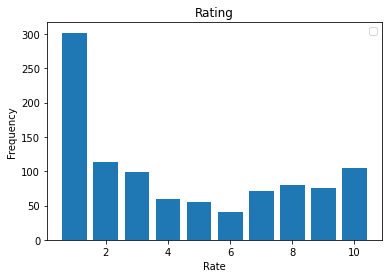

In [34]:
'''DATA VISUALIZATION'''
# bar chart for rating 
keys = freq_map.keys()
values = freq_map.values()
plt.bar(keys, values)
plt.title('Rating')
plt.legend()
plt.xlabel('Rate')
plt.ylabel('Frequency')